# Análisis exploratorio de incidencia delictiva en México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/delitos.csv')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

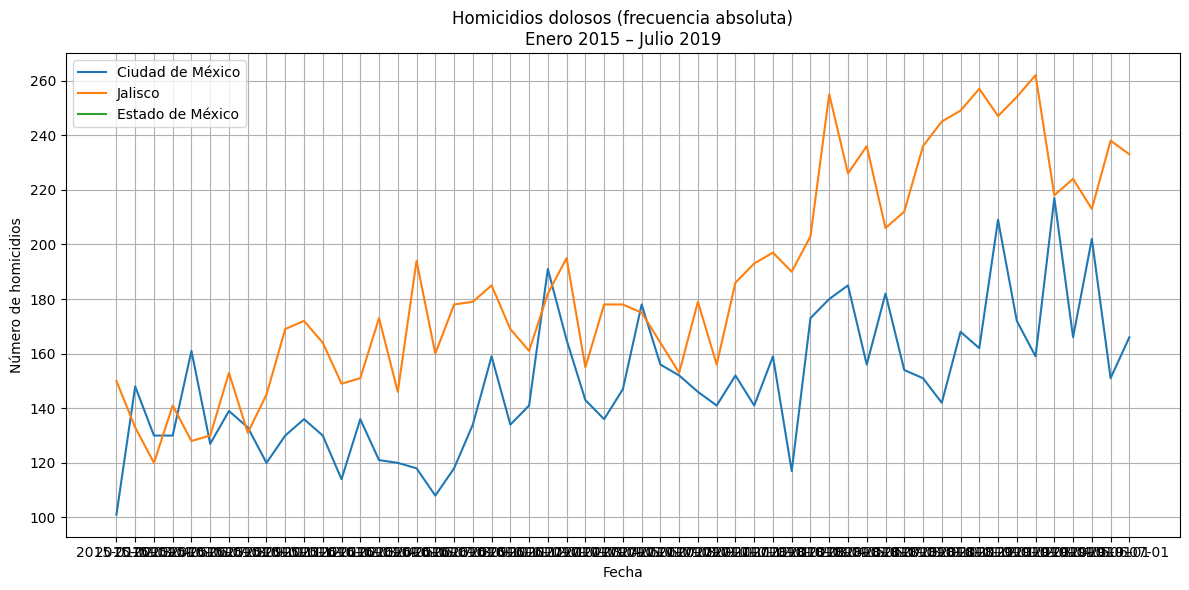

In [14]:
estados = ["Ciudad de México", "Jalisco", "Estado de México"]

df_filtrado = df[
    (df["tipo_de_delito"] == "Homicidio") &
    (df["entidad"].isin(estados)) &
    (df["fecha"] >= "2015-01-01") &
    (df["fecha"] <= "2019-07-01")
]

serie = (
    df_filtrado
    .groupby(["fecha", "entidad"])["frecuencia"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))

for estado in estados:
    datos_estado = serie[serie["entidad"] == estado]
    plt.plot(datos_estado["fecha"], datos_estado["frecuencia"], label=estado)

plt.title("Homicidios dolosos (frecuencia absoluta)\nEnero 2015 – Julio 2019")
plt.xlabel("Fecha")
plt.ylabel("Número de homicidios")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [27]:
df["tipo_de_delito"].unique()

<StringArray>
[                                                                       'Aborto',
                                                            'Abuso de confianza',
                                                                  'Abuso sexual',
                                                                  'Acoso sexual',
                                                        'Allanamiento de morada',
                                                                      'Amenazas',
                                                      'Contra el medio ambiente',
                                                         'Corrupción de menores',
                                                           'Daño a la propiedad',
                                     'Delitos cometidos por servidores públicos',
                                                                       'Despojo',
                                                                   'Electorales',
  

In [29]:
# Pregunta 1: Homicidios en Colima 2018
homicidios_colima_2018 = df[
    (df["entidad"] == "Colima") &
    (df["tipo_de_delito"] == "Homicidio") &
    (df["anio"] == 2018)
]["frecuencia"].sum()

print("1 - Homicidios en Colima 2018:", homicidios_colima_2018)

#  Pregunta 2: Robos de vehículo automotor en 2019
print("2️ - Robos de vehículo automotor en 2019: No disponible en este dataset")

# Pregunta 3: Suma de homicidios y feminicidios por año
suma_hom_fem_por_anio = (
    df[df["tipo_de_delito"].isin(["Homicidio", "Feminicidio"])]
    .groupby("anio")["frecuencia"]
    .sum()
    .reset_index()
)

print("3 - Suma de homicidios y feminicidios por año:")
print(suma_hom_fem_por_anio)

# Pregunta 4: Mes y estado con más feminicidios
feminicidios_max_mes_estado = (
    df[df["tipo_de_delito"] == "Feminicidio"]
    .groupby(["fecha", "entidad"])["frecuencia"]
    .sum()
    .reset_index()
    .sort_values("frecuencia", ascending=False)
    .head(1)
)

print("4 - Mes y estado con mayor número de feminicidios:")
print(feminicidios_max_mes_estado)

# Pregunta 5: Año y estado con más feminicidios
feminicidios_max_anio_estado = (
    df[df["tipo_de_delito"] == "Feminicidio"]
    .groupby(["anio", "entidad"])["frecuencia"]
    .sum()
    .reset_index()
    .sort_values("frecuencia", ascending=False)
    .head(1)
)

print("5 - Año y estado con mayor número de feminicidios:")
print(feminicidios_max_anio_estado)



1 - Homicidios en Colima 2018: 726.0
2️ - Robos de vehículo automotor en 2019: No disponible en este dataset
3 - Suma de homicidios y feminicidios por año:
   anio  frecuencia
0  2015     31744.0
1  2016     36018.0
2  2017     42068.0
3  2018     45385.0
4  2019     45822.0
5  2020     44223.0
6  2021     44960.0
7  2022     43845.0
8  2023     42846.0
9  2024     22307.0
4 - Mes y estado con mayor número de feminicidios:
          fecha entidad  frecuencia
2992 2022-10-01  México        19.0
5 - Año y estado con mayor número de feminicidios:
     anio entidad  frecuencia
176  2020  México       151.0


#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

/tmp/ipykernel_10174/1411461732.py:22: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


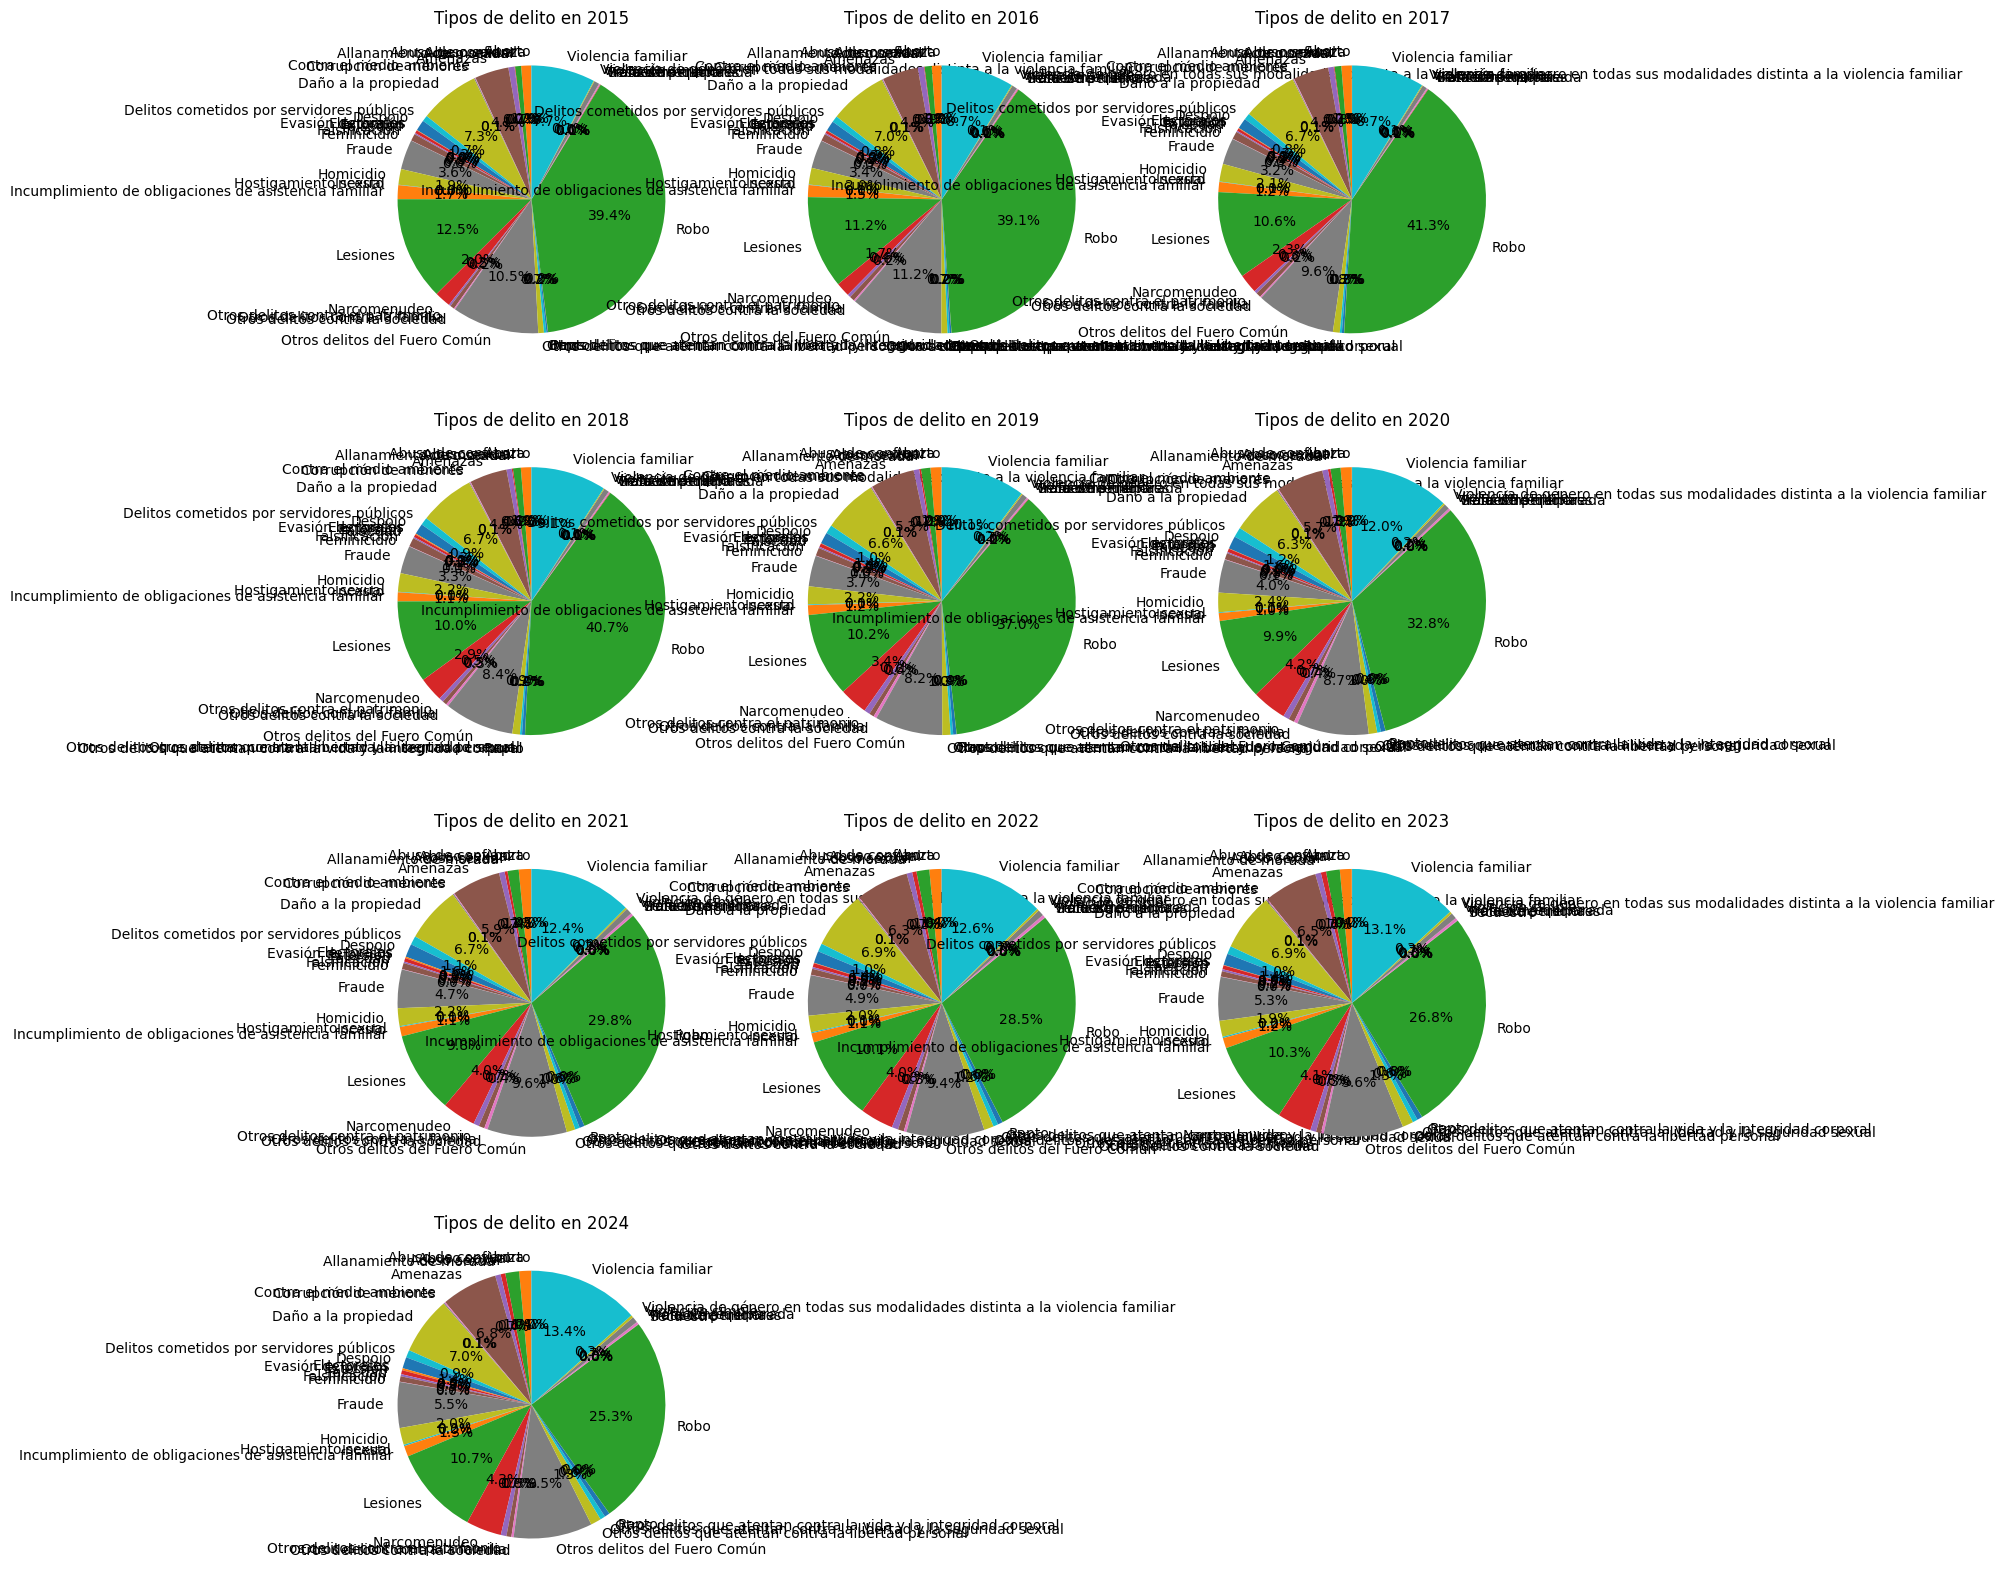

In [37]:
import math
años = sorted(df["anio"].unique())

cols = 3
rows = math.ceil(len(años)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*5))
axes = axes.flatten()

for i, año in enumerate(años):
    df_año = df[df["anio"] == año]
    df_tipo = df_año.groupby("tipo_de_delito")["frecuencia"].sum()

    if df_tipo.sum() > 0:
        axes[i].pie(df_tipo, labels=df_tipo.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(f"Tipos de delito en {año}")
    else:
        axes[i].set_visible(False)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [38]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [46]:
import pandas as pd

df_poblacion = pd.DataFrame({
    "clave_entidad": [1,2,3,4,5],
    "entidad": ["Aguascalientes", "Baja California", "Baja California Sur", "Campeche", "Coahuila de Zaragoza"],
    "poblacion": [1312544, 3315766, 712029, 899931, 5217908]
})

delitos_por_entidad = df.groupby("entidad")["frecuencia"].sum().reset_index()

df_tasa = delitos_por_entidad.merge(df_poblacion, on="entidad")

df_tasa["tasa"] = (df_tasa["frecuencia"] / df_tasa["poblacion"]) * 100000

df_tasa["tasa_anualizada"] = df_tasa["tasa"] * 12

print(df_tasa[["entidad", "frecuencia", "poblacion", "tasa", "tasa_anualizada"]])


                entidad  frecuencia  poblacion          tasa  tasa_anualizada
0        Aguascalientes    330860.0    1312544  25207.535900    302490.430797
1       Baja California   1027969.0    3315766  31002.459160    372029.509923
2   Baja California Sur    208528.0     712029  29286.447603    351437.371231
3              Campeche     79026.0     899931   8781.339903    105376.078833
4  Coahuila de Zaragoza    523033.0    5217908  10023.806476    120285.677708
